# Predictive Analyst Case Study
## Section 1- Insights 
+ We are in Feb 2017. Using the data attached seeing lower revenue in “skills test insight dataset”, can you see if that’s a valid concern? 
+ What other insights and suggestions can you extract from this dataset?
+ What do you think March 2017’s revenue will be?
+ Also, what KPI would you suggest for the product manager to monitor moving forward?

In [1]:
#Load pandas and dataset
import pandas as pd

data1 = pd.read_excel('dataset.xlsx', sheet_name='Section 1 Data Set')
data1.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
0,2017-01-01,Desktop,Home,1106,147,33,1110
1,2017-01-02,Desktop,Home,1214,181,37,1110
2,2017-01-03,Desktop,Home,1265,189,39,1131
3,2017-01-04,Desktop,Home,1232,185,38,1064
4,2017-01-05,Desktop,Home,1254,188,37,1170


In [2]:
#Inspect dataset for datatypes and for any missing data points
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 236 non-null    datetime64[ns]
 1   device               236 non-null    object        
 2   landing_page         236 non-null    object        
 3   landing_pageviews    236 non-null    int64         
 4   checkout_pageviews   236 non-null    int64         
 5   thankyou_pageviews   236 non-null    int64         
 6   revenue              236 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 13.0+ KB


In [3]:
#Clean data columns of blank spaces and inspect data output
data1.columns = data1.columns.str.strip()

data1.date = pd.to_datetime(data1.date).dt.to_period('m')

data1.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
0,2017-01,Desktop,Home,1106,147,33,1110
1,2017-01,Desktop,Home,1214,181,37,1110
2,2017-01,Desktop,Home,1265,189,39,1131
3,2017-01,Desktop,Home,1232,185,38,1064
4,2017-01,Desktop,Home,1254,188,37,1170


In [4]:
#Create a january dataframe and inspect data output
jan = data1.loc[data1.date=='2017-01']

jan.head()

,date,device,landing_page,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
0,2017-01,Desktop,Home,1106,147,33,1110
1,2017-01,Desktop,Home,1214,181,37,1110
2,2017-01,Desktop,Home,1265,189,39,1131
3,2017-01,Desktop,Home,1232,185,38,1064
4,2017-01,Desktop,Home,1254,188,37,1170


jan 2017 revenue: $84,619
feb 2017 revenue: $73,437
feb 2017 revenue down -$11,182 versus previous month


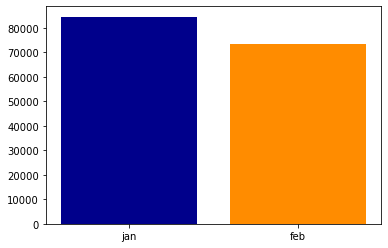

In [8]:
#Create a february dataframe and compare its revenue to january
feb = data1.loc[data1.date=='2017-02']

print("jan 2017 revenue:", "${:,}".format(jan.revenue.sum()))
print("feb 2017 revenue:", "${:,}".format(feb.revenue.sum()))

print("feb 2017 revenue down", "-${:,}".format(jan.revenue.sum()-feb.revenue.sum()), "versus previous month")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.bar(("jan", "feb"), (jan.revenue.sum(), feb.revenue.sum()), color=("darkblue", "darkorange"))  

plt.show()

<div class="alert alert-success" role="alert">
<strong>We are in Feb 2017. Using the data attached seeing lower revenue in “skills test insight dataset”, can you see if that’s a valid concern?</strong> 

Yes, it is a concern as revenue for this month is down versus previous month by -$11,182

In [9]:
#Create a new dataframe with the datetime column as the index and combine desktop & mobile daily values
df1 = pd.read_excel('dataset.xlsx', sheet_name='Section 1 Data Set')
df1.columns = df1.columns.str.strip()

df1.index = df1.date
df1 = df1.drop(["date", "device", "landing_page"], axis=1)

df1 = df1.resample('D').agg({"landing_pageviews":"sum", "checkout_pageviews": "sum", "thankyou_pageviews": "sum", "revenue": "sum"})

df1.head()

,landing_pageviews,checkout_pageviews,thankyou_pageviews,revenue
date,,,,
2017-01-01,4709,593,156,2791
2017-01-02,5217,738,153,2791
2017-01-03,5357,764,159,2881
2017-01-04,5404,772,161,2748
2017-01-05,5199,742,153,2706


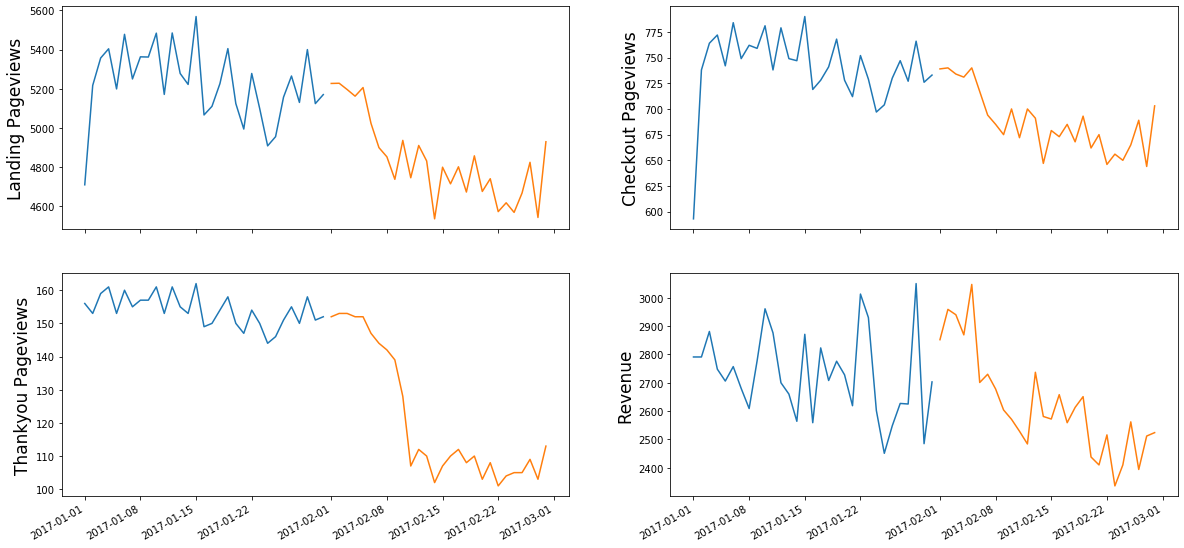

In [10]:
jan_dt = df1["2017-01-01":"2017-01-31"]
feb_dt = df1["2017-02-01":"2017-02-28"]

fig, ax = plt.subplots(2, 2, figsize=(20,10))
fig.autofmt_xdate()

ax[0,0].plot(jan_dt.landing_pageviews)
ax[0,0].plot(feb_dt.landing_pageviews)
ax[0,0].set_ylabel("Landing Pageviews", size=17)

ax[0,1].plot(jan_dt.checkout_pageviews)
ax[0,1].plot(feb_dt.checkout_pageviews)
ax[0,1].set_ylabel("Checkout Pageviews", size=17)

ax[1,0].plot(jan_dt.thankyou_pageviews)
ax[1,0].plot(feb_dt.thankyou_pageviews)
ax[1,0].set_ylabel("Thankyou Pageviews", size=17)

ax[1,1].plot(jan_dt.revenue)
ax[1,1].plot(feb_dt.revenue)
ax[1,1].set_ylabel("Revenue", size=17)

plt.show()

<div class="alert alert-success" role="alert">
<strong>What other insights and suggestions can you extract from this dataset?</strong> 

Looking at the daily performance of Desktop and Mobile combined, the data (illustrated above) shows the decline of Feb's landing pageviews, checkout pageviews, and thankyou page views and revenue when compared to those of Jan.  The decline of Feb's metrics is especially noticeable somewhere between early- and mid-Feb where it reaches its lowest point.  While this looks concerning, it would be more informative to compare Feb to its previous yearly performances for a more apples to apples comparison because previous monthly comparisons may be confounded by other variables such as seasonality, marketing campaigns, competitive promotions, post-holiday shopping and other factors alike.

<div class="alert alert-success" role="alert">
<strong>What do you think March 2017’s revenue will be?</strong> 

March 2017's revenue will likely be higher than that of Feb's as the data (illustrated above) shows gradual growth across all metrics in late Feb.  It is impossible to forecast March 2017's exact revenue because we have a small sample size (two previous months) and the daily view shows how volitale the 

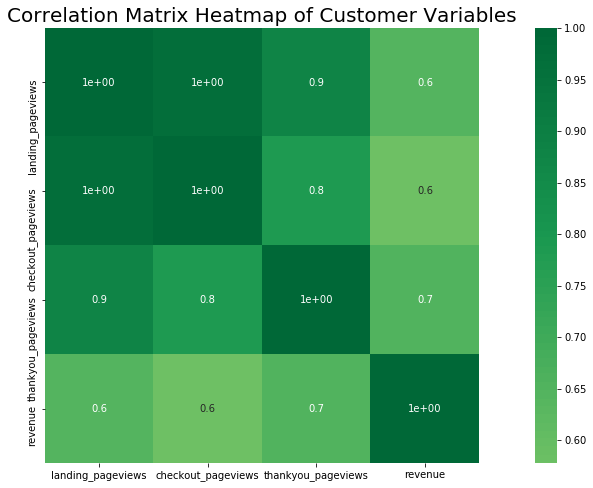

In [27]:
plt.figure(figsize=(20, 8))

sns.heatmap(df1.corr(), center=0, square=True, annot=True, fmt='.01', cmap="RdYlGn")
plt.title("Correlation Matrix Heatmap of Customer Variables", size=20);

plt.show()

<div class="alert alert-success" role="alert">
<strong>Also, what KPI would you suggest for the product manager to monitor moving forward?</strong> 

Using a correlation heatmap (pictured above), I would suggest for the product manager to monitor landing pageviews because it trends the most positively with the other metrics, especially with the checkout pageviews -- which drives consumers to likely complete their online purchases.

## Section 2- Recommendations
+ Please design a process that returns the top 5 recommended practice areas for a given user.

In [47]:
#Load dataset into new dataframe
data2 = pd.read_excel('dataset.xlsx', sheet_name='Section 2 Data Set')

data2.head()

,attorney_id,specialty_id
0,100000,218
1,100001,263
2,100001,436
3,100001,218
4,100001,481


In [60]:
#Inspect dataset for any missing data points
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   attorney_id   200000 non-null  int64
 1   specialty_id  200000 non-null  int64
dtypes: int64(2)
memory usage: 3.1 MB


In [51]:
#Check the unique number of attorney ids in dataset
len(data2.attorney_id.unique())

39369

In [49]:
#Check the unique number of specialty ids in dataset
len(data2.specialty_id.unique())

134

In [75]:
#Create a column to count how many attornies are on a specific specialty id
df2 = data2.groupby("specialty_id")["attorney_id"].count().reset_index(name="count_attorney_id")

df2.head()

,specialty_id,count_attorney_id
0,109,90
1,191,1078
2,192,14
3,193,388
4,194,296


In [62]:
df_merge = pd.merge(data2, df2, on="specialty_id", how="left")

df_merge.head()

,attorney_id,specialty_id,count_attorney_id
0,100000,218,14780
1,100001,263,3015
2,100001,436,3275
3,100001,218,14780
4,100001,481,2671


<div class="alert alert-success" role="alert">
<strong>Please design a process that returns the top 5 recommended practice areas for a given user.</strong> 

Using a correlation heatmap (pictured above), I would suggest for the product manager to monitor landing pageviews because it trends the most positively with the other metrics, especially with the checkout pageviews -- which drives consumers to likely complete their online purchases.